<AxesSubplot:xlabel='t'>

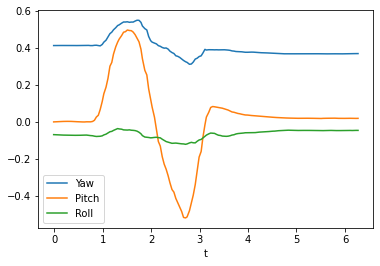

In [98]:
#%matplotlib tk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


df_muleta = pd.read_csv('teste2.csv')
offset = -0.55
df_muleta['t'] = (df_muleta['timestamp'] - df_muleta['timestamp'][0])*0.001
df_muleta['t'] = df_muleta['t'] + offset
df_muleta['Pitch'] = (df_muleta['Pitch'] - df_muleta['Pitch'][0])
df_muleta['angle_crutch'] = df_muleta['Pitch'].rolling(15).mean()
df_muleta.dropna(inplace=True)
df_muleta.plot(x='t',y=['Yaw','Pitch','Roll'])

In [83]:
df_muleta

,timestamp,FX,FY,FZ,Yaw,Pitch,Roll,t,angle_crutch
24,1669654257559,0.606435,2.173704,12.921809,0.411609,0.000443,-0.073759,0.240,-0.001014
25,1669654257601,0.606435,2.173704,12.921809,0.411811,0.000141,-0.074063,0.282,-0.001008
26,1669654257639,0.584270,2.176120,12.922283,0.411460,-0.000492,-0.074081,0.320,-0.000997
27,1669654257678,0.584270,2.176120,12.922283,0.411481,-0.001019,-0.073931,0.359,-0.000988
28,1669654257707,0.575853,2.189481,13.126627,0.411251,-0.001434,-0.073775,0.388,-0.000986
...,...,...,...,...,...,...,...,...,...
167,1669654263279,0.850910,1.786980,11.725945,0.368289,0.017975,-0.047763,5.960,0.017913
168,1669654263320,0.850910,1.786980,11.725945,0.367767,0.017645,-0.048089,6.001,0.017899
169,1669654263359,0.834283,1.786608,11.579700,0.367756,0.017416,-0.047510,6.040,0.017876
170,1669654263400,0.834283,1.786608,11.579700,0.367867,0.017396,-0.047384,6.081,0.017842


<AxesSubplot:xlabel='t'>

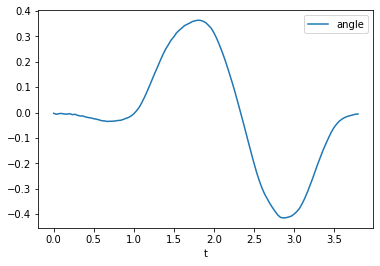

In [34]:
df_tracker= pd.read_csv('teste_pitch.csv', sep=';',decimal='.',skiprows=1)
df_tracker['angle'] = np.arctan(df_tracker['y']/df_tracker['x'])
df_tracker['angle'] = -1*df_tracker['angle']

df_tracker.plot(x='t',y=['angle'])

In [99]:
merge=pd.merge_asof(df_tracker,df_muleta, on ='t', direction='nearest')

merge['angle_crutch'] = merge['angle_crutch']*(180/np.pi)
merge['angle'] = merge['angle']*(180/np.pi)

<AxesSubplot:xlabel='t'>

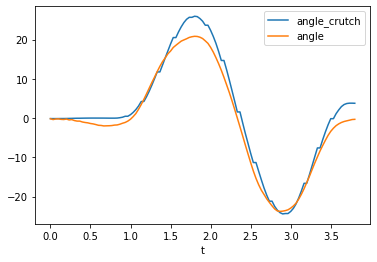

In [100]:
merge.plot(x='t',y=['angle_crutch', "angle"])

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(merge['angle_crutch'],merge['angle']))
r2_score=r2_score(merge['angle_crutch'],merge['angle'])
merge['Error'] = merge['angle'] - merge['angle_crutch']
std = merge['Error'].std()
error_mean = merge['Error'].mean()

print('RMSE:{0}'.format(rmse))
print('R2 Score:{0}'.format(r2_score))
print('Desv.Pad Erro:{0}'.format(std))

RMSE:2.481556391784732
R2 Score:0.9667881141677337
Desv.Pad Erro:1.70446240291311


In [105]:
error_mean

-1.810577969189677

<AxesSubplot:xlabel='t'>

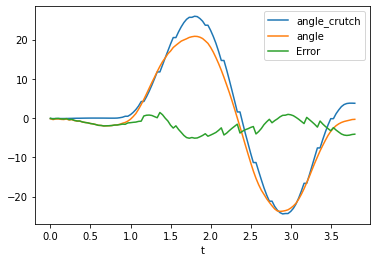

In [104]:
merge.plot(x='t',y=['angle_crutch', "angle",'Error'])

In [ ]:
df_muleta_roll = pd.read_csv('teste4.csv')
offset = -0.55
df_muleta_roll['t'] = (df_muleta_roll['timestamp'] - df_muleta_roll['timestamp'][0])*0.001
df_muleta_roll['t'] = df_muleta_roll['t'] + offset
df_muleta_roll['Pitch'] = (df_muleta_roll['Pitch'] - df_muleta_roll['Pitch'][0])
df_muleta_roll['angle_crutch'] = df_muleta_roll['Pitch'].rolling(15).mean()
df_muleta_roll.dropna(inplace=True)
df_muleta_roll.plot(x='t',y=['Yaw','Pitch','Roll'])

In [ ]:
df_tracker_roll= pd.read_csv('teste_roll.csv', sep=';',decimal='.',skiprows=1)
df_tracker_roll['angle'] = np.arctan(df_tracker_roll['y']/df_tracker_roll['x'])
df_tracker_roll['angle'] = -1*df_tracker_roll['angle']

df_tracker_roll.plot(x='t',y=['angle'])

In [ ]:
merge=pd.merge_asof(df_tracker,df_muleta, on ='t', direction='nearest')

merge['angle_crutch'] = merge['angle_crutch']*(180/np.pi)
merge['angle'] = merge['angle']*(180/np.pi)